In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

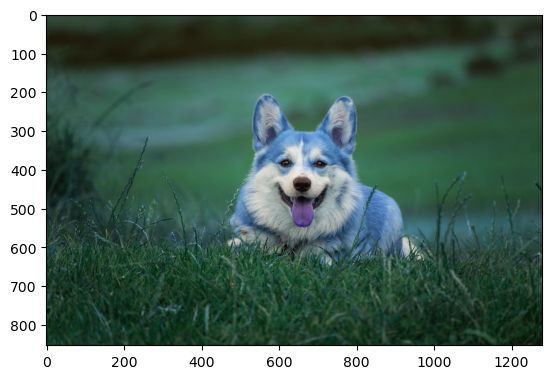

In [2]:
dog = cv2.imread('dog-6389277_1280.jpg')
plt.imshow(dog)

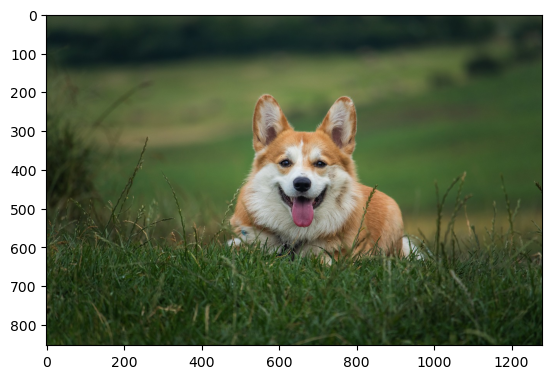

In [3]:
# BGR->RGB変換(Open cvのデフォルトはBGR)
dog_rgb = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)
plt.imshow(dog_rgb)

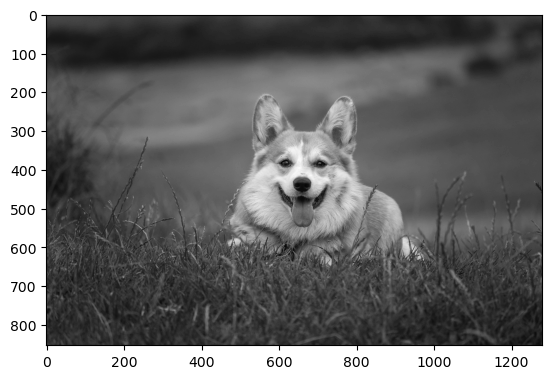

In [5]:
#モノクロに変換
dog_gray = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
plt.imshow(dog_gray, cmap='gray')

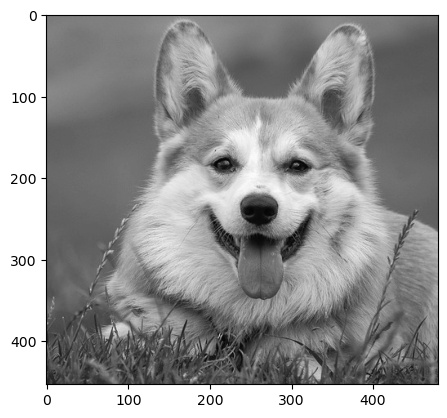

In [9]:
#切り取り
dog_crop = dog_gray[200:-200, 400:-400]
plt.imshow(dog_crop, cmap='gray')

### Binalization

<Axes: ylabel='Count'>

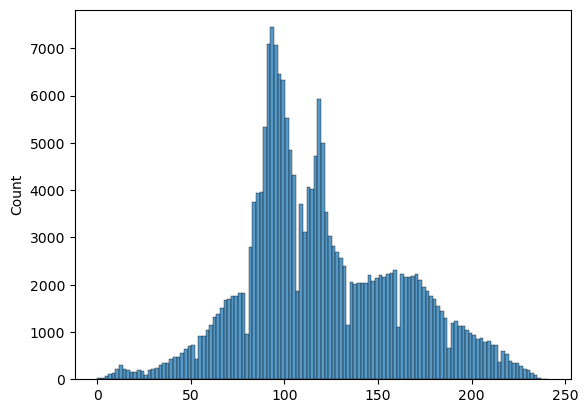

In [13]:
# 輝度のヒストグラム
sns.histplot(dog_crop.flatten())

In [37]:
# 輝度の閾値を設定
# 閾値120を超えた画素を255にする
ret = 120
ret, thresh = cv2.threshold(dog_crop, ret, 255, cv2.THRESH_BINARY)

In [38]:
# 戻り値は ret=閾値, thresh=binary image
ret

120.0

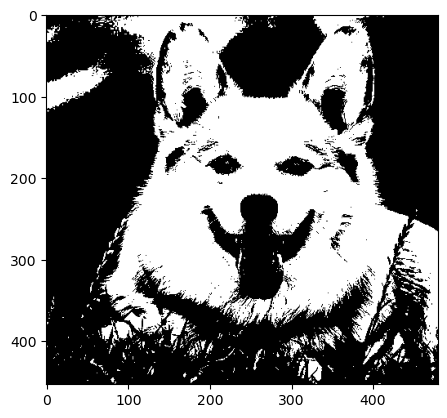

In [36]:
plt.imshow(thresh, cmap='gray')

### Open CVのデータベースを使った顔の認識

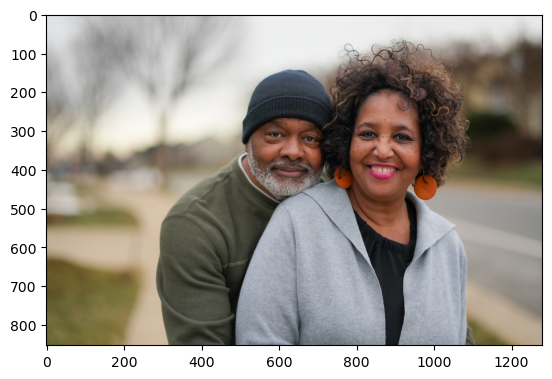

In [51]:
#画像の読み込み・RGB変換
im = cv2.imread('couple-6962202_1280.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)

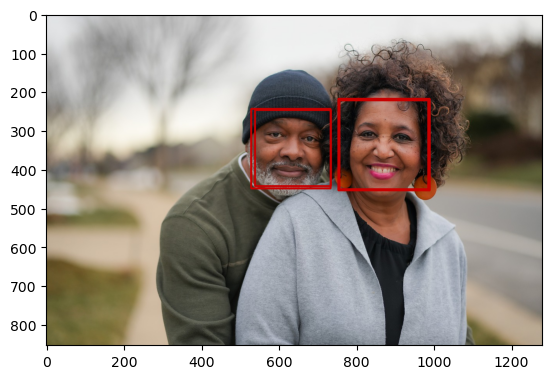

In [65]:
# Open CVのファイルを読み込み
cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
face = cascade.detectMultiScale(gray, scaleFactor =1.1, minNeighbors=3, minSize=(30,30))

#検出部分を囲む
for x, y, w, h in face:
    cv2.rectangle(im, (x, y), (x+w, y+h), (200, 0, 0), 3)

plt.imshow(im)